# Titanic Survival Prediction Project
This notebook demonstrates an end-to-end machine learning pipeline for predicting Titanic passenger survival. It covers data cleaning, feature engineering, exploratory data analysis (EDA), model building, evaluation, and prediction filtering/sorting.

## 1. Load and Clean Data
Load the Titanic dataset and apply cleaning functions to handle missing values and perform necessary transformations.

In [49]:
# Import required libraries and custom modules
import os
import pandas as pd
from data_loader import load_data, clean_data
from feature_engineering import add_family_size, extract_title, encode_features
data_path = os.path.join('..', 'titanic', 'train.csv')
df = load_data(data_path)
df_clean = clean_data(df)
df_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,HasCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Unknown,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Unknown,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Unknown,S,0


### Data Cleaning Summary
- Missing values in 'Age' are filled with the median age.
- Missing values in 'Embarked' are filled with the mode.
- 'Cabin' missing values are marked as 'Unknown' and a 'HasCabin' feature is created.
- Irrelevant columns ('Ticket', 'PassengerId') are dropped.
- Fare inconsistencies are fixed by replacing zeros and missing values with the median fare.

## 2. Feature Engineering
Apply feature engineering steps such as adding family size, extracting titles, and encoding categorical features.

In [50]:
# Apply feature engineering steps
df_fe = add_family_size(df_clean)
df_fe = extract_title(df_fe)
# Preserve original Pclass for EDA before encoding
df_fe['Pclass_original'] = df_fe['Pclass']
df_fe = encode_features(df_fe)
# For EDA, add back the original Pclass as 'Pclass' for plotting
df_fe['Pclass'] = df_fe['Pclass_original']
df_fe.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,HasCabin,FamilySize,Title,Pclass_original,Pclass_2,Pclass_3,Pclass
0,0,"Braund, Mr. Owen Harris",1,-0.565736,1,0,-0.508624,Unknown,2,0,0.059160,2,3,False,True,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,0.783878,C85,0,1,0.059160,3,1,False,False,1
2,1,"Heikkinen, Miss. Laina",0,-0.258337,0,0,-0.494999,Unknown,2,0,-0.560975,1,3,False,True,3
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,0.416851,C123,2,1,0.059160,3,1,False,False,1
4,0,"Allen, Mr. William Henry",1,0.433312,0,0,-0.492476,Unknown,2,0,-0.560975,2,3,False,True,3


### Feature Engineering Summary
- Created 'FamilySize' as SibSp + Parch + 1.
- Extracted titles from 'Name' and grouped rare titles.
- Encoded categorical variables: Sex, Embarked, Title, Pclass.
- Scaled numerical features: Age, Fare, FamilySize.

## 3. Save Cleaned Dataset
Save the cleaned and preprocessed dataset to a CSV file for reference and reproducibility.

In [51]:
# Save cleaned and preprocessed dataset
df_fe.to_csv('titanic_cleaned.csv', index=False)
print('Cleaned dataset saved as titanic_cleaned.csv')

Cleaned dataset saved as titanic_cleaned.csv


## 4. Exploratory Data Analysis (EDA)
Generate visualizations and insights: plot survival by gender, survival by passenger class, age distribution, survival by embarked port, and passenger class vs survival.

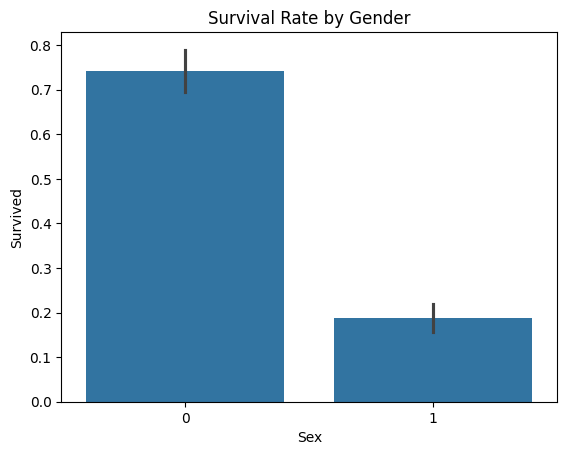

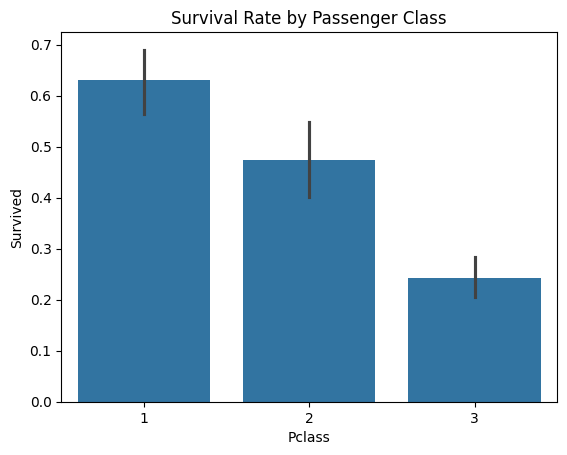

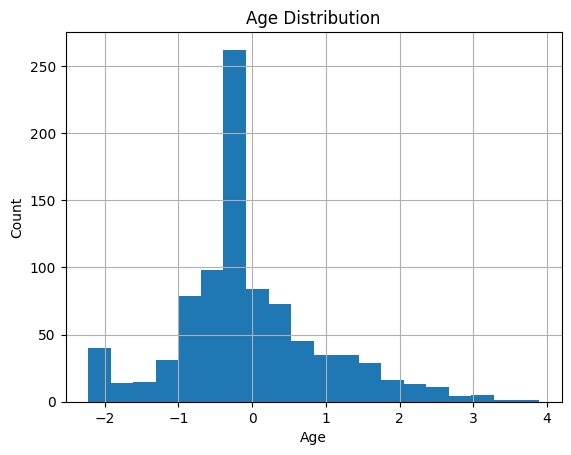

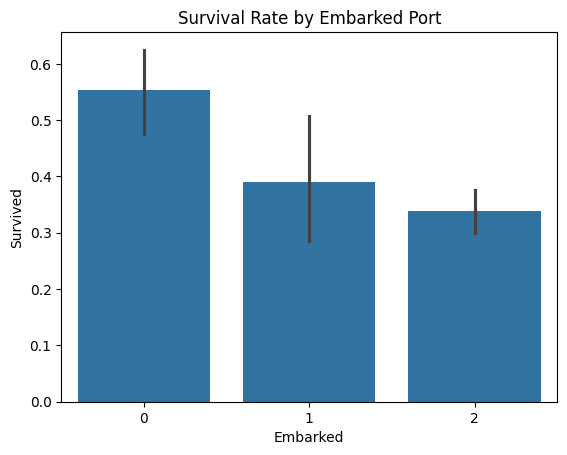

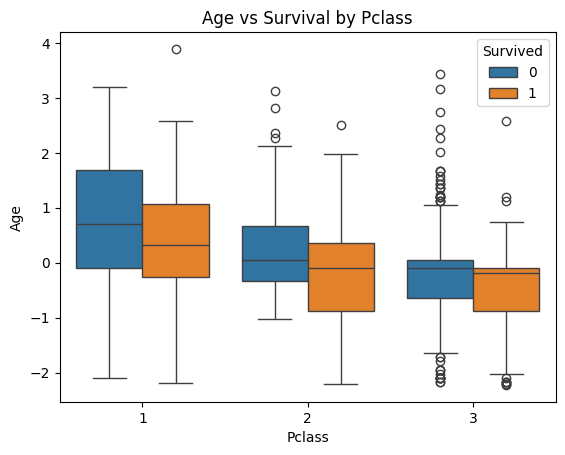

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from eda import plot_survival_by_gender, plot_survival_by_pclass, plot_age_histogram, plot_survival_by_embarked, plot_pclass_vs_survival
plot_survival_by_gender(df_fe)
plot_survival_by_pclass(df_fe)
plot_age_histogram(df_fe)
plot_survival_by_embarked(df_fe)
plot_pclass_vs_survival(df_fe)

### EDA Insights
- **Gender:** Females had a much higher survival rate than males.
- **Passenger Class:** First class passengers had the highest survival rate, followed by second and third class.
- **Age:** Younger passengers (children) had higher survival rates.
- **Embarked Port:** Passengers embarked from Cherbourg (C) had higher survival rates.
- **Class vs Survival:** Survival rates varied significantly across passenger classes and age groups.